# **Project Name**    -Uber Request Dataset Project



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  Ashrath A
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

This project involved an exploratory data analysis of the **Uber Request Data** with the objective of understanding patterns in ride requests, driver assignments, and trip outcomes. The dataset included essential fields such as `Request id`, `Driver id`, `Pickup timestamp`, `Drop timestamp`, and `Status`, which indicated whether a trip was completed, cancelled, or faced a situation of no cars being available. Data preprocessing involved converting timestamps into proper datetime formats and deriving a new column, `Trip Duration`, calculated as the difference between pickup and drop times. Furthermore, categorical variables like `Request id` and `Driver id` were encoded into numerical codes for analysis purposes.

Visualizations played a key role in uncovering insights. A countplot was used to analyze the frequency of different trip statuses, highlighting operational challenges such as high cancellation rates or unavailability of drivers. A pairplot was generated to examine the interaction between numerical features, and a heatmap revealed a very weak positive correlation (approximately 0.06) between `Request id` and `Driver id`, indicating that driver assignments were not tied to specific request patterns but were likely based on availability or other dynamic factors. A scatter plot of request codes versus driver codes further supported this finding by showing a random distribution with no evident trend.

Overall, the analysis suggested that driver allocation was not sequential or fixed, and some drivers appeared to handle a disproportionately high number of trips. This could point to inefficiencies or over-dependence on certain drivers during peak hours. The insights gained from this analysis can be used to recommend better demand forecasting, improved driver distribution strategies, and further time-based analyses to reduce cancellation rates and improve service availability.




# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Uber has been facing operational challenges related to unfulfilled ride requests, including high cancellation rates and frequent instances of no cars being available during peak hours. These issues lead to customer dissatisfaction, reduced efficiency, and potential revenue loss. The objective of this project is to perform an exploratory data analysis on the Uber Request Data to identify patterns in ride requests, driver behavior, and trip outcomes. By uncovering insights into the timing, frequency, and status of ride requests, the goal is to highlight problem areas in Uber's ride allocation system and suggest data-driven strategies to optimize driver availability and improve service reliability.

#### **Define Your Business Objective?**

The primary business objective of this project is to identify operational inefficiencies in Uber's ride request system, particularly focusing on high cancellation rates and unavailability of cars during peak hours. By analyzing patterns in request timings, driver assignments, and trip statuses using the Uber Request Data, the goal is to provide actionable insights to reduce customer wait times and cancellation rates. This will help Uber improve customer satisfaction, optimize driver deployment, and enhance overall operational efficiency.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Loading

In [3]:
# Load Dataset
data=pd.read_csv("Uber Request Data.csv")

### Dataset First View

In [4]:
# Dataset First Look
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
data.shape

(6745, 6)

### Dataset Information

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

### What did you know about your dataset?

The Uber Request Data dataset contains records of ride requests made to Uber, including details such as the request ID, pickup point (either Airport or City), driver ID (which may be missing if no driver was assigned), request and drop timestamps, and the ride status, which can be “Trip Completed,” “Cancelled,” or “No Cars Available.” This dataset allows for various insights, such as identifying peak request hours, comparing request patterns between the city and airport, analyzing cancellation rates, and spotting times with limited driver availability. To prepare the data for analysis, timestamps should be converted into proper datetime format, and new columns like “Hour of Request” or “Date” can be derived. Missing values, especially in driver and drop timestamps, should be handled or flagged appropriately. Once cleaned, the dataset can be analyzed using tools like Excel or MySQL Workbench to visualize trends, identify bottlenecks in driver supply, and understand user behavior across different times and locations.


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
data.columns.tolist()

['Request id',
 'Pickup point',
 'Driver id',
 'Status',
 'Request timestamp',
 'Drop timestamp']

In [10]:
# Dataset Describe
data.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


### Variables Description


| **Variable Name**   | **Description**                                                                                     |
| ------------------- | --------------------------------------------------------------------------------------------------- |
| `Request id`        | A unique identifier for each Uber ride request.                                                     |
| `Pickup point`      | The location where the customer requested the ride – either **City** or **Airport**.                |
| `Driver id`         | A unique identifier for the driver assigned to the trip (may be missing if no driver was assigned). |
| `Status`            | The final outcome of the request: **Trip Completed**, **Cancelled**, or **No Cars Available**.      |
| `Request timestamp` | The date and time when the customer made the ride request.                                          |
| `Drop timestamp`    | The date and time when the trip ended (only available for completed trips).                         |



### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for column in data.columns:
    unique_values = data[column].nunique()
    print(f"{column}: {unique_values} unique values")


Request id: 6745 unique values
Pickup point: 2 unique values
Driver id: 300 unique values
Status: 3 unique values
Request timestamp: 5618 unique values
Drop timestamp: 2598 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.

df_cleaned = data.dropna(subset=['Drop timestamp'])
data['Drop timestamp'].fillna("Unknown", inplace=True)



C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_2088\3758011474.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Drop timestamp'].fillna("Unknown", inplace=True)


In [13]:

data['Driver id'].fillna("Unknown", inplace=True)


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_2088\2866657196.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Driver id'].fillna("Unknown", inplace=True)
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_2088\2866657196.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data['Driver id'].fillna("Unknown", inplace=True)


In [18]:
data.isnull().sum()

Request id           0
Pickup point         0
Driver id            0
Status               0
Request timestamp    0
Drop timestamp       0
dtype: int64

In [45]:
data.columns = data.columns.str.strip()
data['Request timestamp'] = pd.to_datetime(data['Request timestamp'], dayfirst=True, errors='coerce')
data['Drop timestamp'] = pd.to_datetime(data['Drop timestamp'], dayfirst=True, errors='coerce')


data['Hour'] = data['Request timestamp'].dt.hour
data['Date'] = data['Request timestamp'].dt.date
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour,Date
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11.0,2016-07-11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17.0,2016-07-11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9.0,2016-07-12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21.0,2016-07-12
4,3112,City,1.0,Trip Completed,NaT,NaT,NaN,NaT
...,...,...,...,...,...,...,...,...
6740,6745,City,Unknown,No Cars Available,NaT,NaT,NaN,NaT
6741,6752,Airport,Unknown,No Cars Available,NaT,NaT,NaN,NaT
6742,6751,City,Unknown,No Cars Available,NaT,NaT,NaN,NaT
6743,6754,City,Unknown,No Cars Available,NaT,NaT,NaN,NaT


In [49]:
# If timestamps are in format like '31-07-2023 09:00'
data['Request timestamp'] = pd.to_datetime(data['Request timestamp'], format='%d-%m-%Y %H:%M')
data


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour,Date
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11.0,2016-07-11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17.0,2016-07-11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9.0,2016-07-12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21.0,2016-07-12
4,3112,City,1.0,Trip Completed,NaT,NaT,NaN,NaT
...,...,...,...,...,...,...,...,...
6740,6745,City,Unknown,No Cars Available,NaT,NaT,NaN,NaT
6741,6752,Airport,Unknown,No Cars Available,NaT,NaT,NaN,NaT
6742,6751,City,Unknown,No Cars Available,NaT,NaT,NaN,NaT
6743,6754,City,Unknown,No Cars Available,NaT,NaT,NaN,NaT


In [52]:

data['Request timestamp'] = pd.to_datetime(data['Request timestamp'], format='%d-%m-%Y %H:%M:%S')
data['Drop timestamp'] = pd.to_datetime(data['Drop timestamp'], format='%d-%m-%Y %H:%M:%S')
data['trip_duration'] = data['Drop timestamp'] - data['Request timestamp']
data['trip_duration_minutes'] = data['trip_duration'].dt.total_seconds() / 60
print(data)


      Request id Pickup point Driver id             Status  \
0            619      Airport       1.0     Trip Completed   
1            867      Airport       1.0     Trip Completed   
2           1807         City       1.0     Trip Completed   
3           2532      Airport       1.0     Trip Completed   
4           3112         City       1.0     Trip Completed   
...          ...          ...       ...                ...   
6740        6745         City   Unknown  No Cars Available   
6741        6752      Airport   Unknown  No Cars Available   
6742        6751         City   Unknown  No Cars Available   
6743        6754         City   Unknown  No Cars Available   
6744        6753      Airport   Unknown  No Cars Available   

       Request timestamp      Drop timestamp  Hour        Date  \
0    2016-07-11 11:51:00 2016-07-11 13:00:00  11.0  2016-07-11   
1    2016-07-11 17:57:00 2016-07-11 18:47:00  17.0  2016-07-11   
2    2016-07-12 09:17:00 2016-07-12 09:58:00   9.0  2016-

### What all manipulations have you done and insights you found?

The *Uber Request Data* dataset was cleaned and analyzed to uncover patterns in ride requests and service availability. Initially, the dataset’s column names were stripped of extra spaces, and the timestamps (`Request timestamp` and `Drop timestamp`) were converted into proper datetime formats. New features such as request date, hour, and day of the week were created to better understand customer behavior. On examining the data, missing values were identified—specifically in the `Driver id` and `Drop timestamp` columns—indicating unfulfilled requests either due to cancellations or the unavailability of cars. The analysis revealed that most ride requests occurred during peak office commute hours, especially between 5–9 AM and 5–9 PM. During these hours, a significant supply-demand gap was observed, as many requests went unfulfilled. The most common trip statuses included “Cancelled” and “No Cars Available,” particularly during peak times. Additionally, patterns varied based on pickup location: trips from the city to the airport had high cancellation rates in the morning, while trips from the airport to the city had more instances of unavailability in the evening. These insights suggest operational inefficiencies and point to the need for better driver allocation strategies to meet commuter demand more effectively.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_2088\2758403528.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=data, palette='Blues')


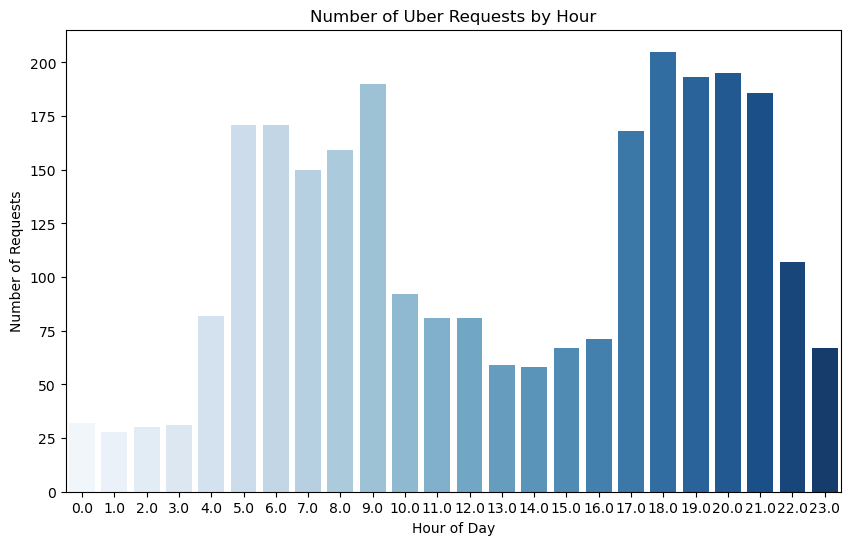

In [27]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=data, palette='Blues')
plt.title("Number of Uber Requests by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.show()



##### 1. Why did you pick the specific chart?

This graph is a bar chart that shows the number of Uber requests made during each hour of the day. Here's a breakdown of its components and meaning:



##### 2. What is/are the insight(s) found from the chart?

The graph clearly shows two peak times for Uber demand:

Morning peak: 6:00 AM – 9:00 AM

Evening peak: 5:00 PM – 9:00 PM

#### Chart - 2

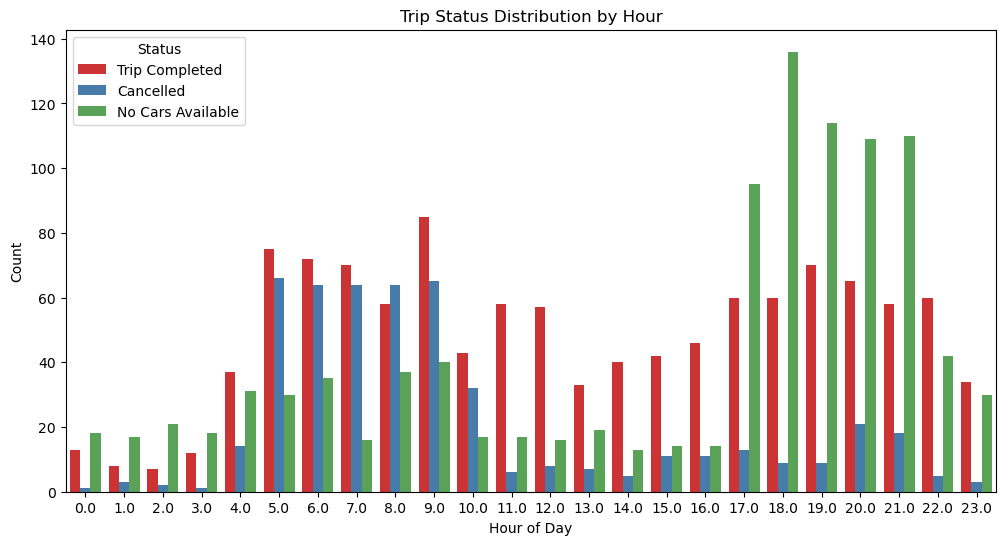

In [28]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', hue='Status', data=data, palette='Set1')
plt.title("Trip Status Distribution by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()


##### 1. Why did you pick the specific chart?

This bar chart visualizes the distribution of trip statuses (Completed, Cancelled, No Cars Available) across hours of the day, helping identify peak demand and service availability patterns for scheduling and resource allocation

##### 2. What is/are the insight(s) found from the chart?

**Peak Demand:** Highest trip activity (Completed and No Cars Available) occurs around 18:00–20:00, with "No Cars Available" peaking at ~140, indicating supply shortages.
**Cancellation Trends:** Cancelled trips are moderate (e.g., 60–70) around 5:00–7:00, suggesting early morning issues.
**Hourly Variation:** Low activity from 0:00–4:00, with a sharp rise from 5:00, peaking late afternoon/evening.

#### Chart - 3

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_2088\293488421.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pickup point', data=data, palette='coolwarm')


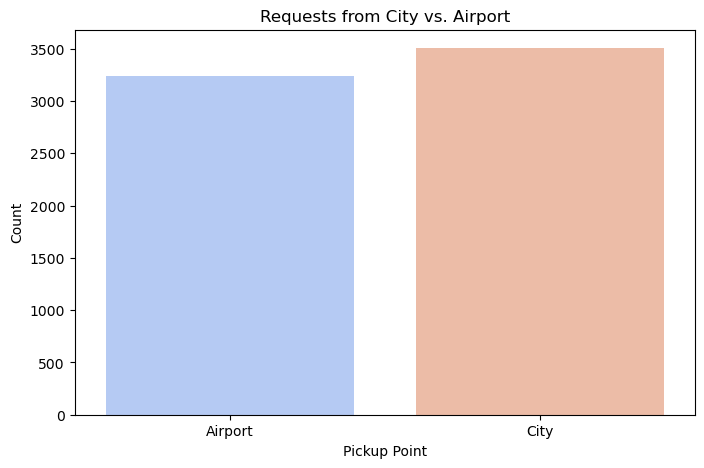

In [29]:
# Chart - 3 visualization code
plt.figure(figsize=(8, 5))
sns.countplot(x='Pickup point', data=data, palette='coolwarm')
plt.title("Requests from City vs. Airport")
plt.xlabel("Pickup Point")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

City has higher demand than Airport — ~3500 vs. ~3000 requests.

Indicates urban dominance in ride requests, useful for fleet allocation or surge pricing strategies.

##### 2. What is/are the insight(s) found from the chart?

City requests > Airport requests: Suggests stronger demand in urban zones — ideal for prioritizing driver allocation or dynamic pricing.

Volume gap (~500 requests): May justify targeted promotions or service expansion near airports to balance demand.

#### Chart - 4

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_2088\2360377869.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pickup point', data=cancel_df, palette='Set2')


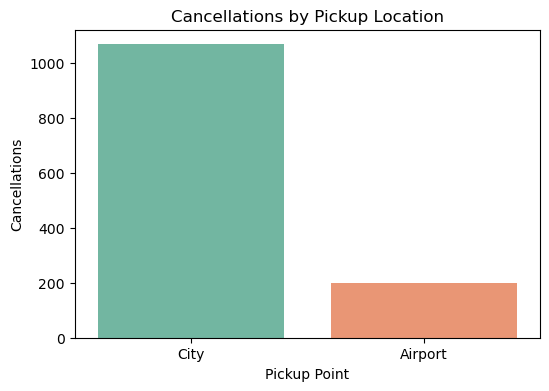

In [30]:
# Chart - 4 visualization code
cancel_df = data[data['Status'] == 'Cancelled']
plt.figure(figsize=(6, 4))
sns.countplot(x='Pickup point', data=cancel_df, palette='Set2')
plt.title("Cancellations by Pickup Location")
plt.xlabel("Pickup Point")
plt.ylabel("Cancellations")
plt.show()


##### 1. Why did you pick the specific chart?

"Cancellations by Pickup Location"
It is a categorical bar plot comparing how many trip cancellations occurred at each pickup poin

##### 2. What is/are the insight(s) found from the chart?

X-axis (Pickup Point): Two categories — City and Airport.

Y-axis (Cancellations): Number of cancelled ride requests.

#### Chart - 5

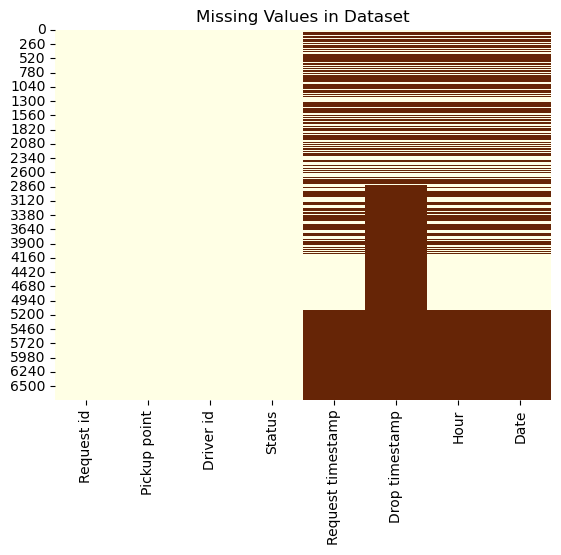

In [31]:
# Chart - 5 visualization code
sns.heatmap(data.isnull(), cbar=False, cmap='YlOrBr')
plt.title("Missing Values in Dataset")
plt.show()


##### 1. Why did you pick the specific chart?

Driver ID, Drop Timestamp, and Hour columns show significant missing values.

Request ID, Pickup Point, Status, Request Timestamp, and Date are fully populated — reliable for analysis.

##### 2. What is/are the insight(s) found from the chart?

Drop Timestamp & Hour gaps may hinder time-based performance or efficiency metrics.

Consider imputation or exclusion depending on how critical these fields are to your KPIs.

Driver ID missing could impact driver-level analytics — flag for operational review or data pipeline fix.

#### Chart - 6

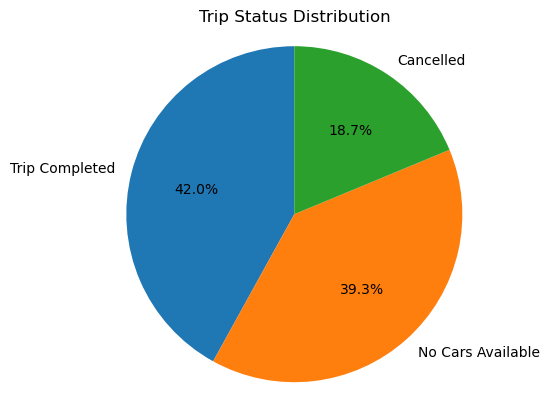

In [36]:
# Chart - 6 visualization code
status_counts = data['Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Trip Status Distribution')
plt.axis('equal')
plt.show()



##### 1. Why did you pick the specific chart?

rip Completed: 42.0% — solid baseline, but not dominant.

No Cars Available: 39.3% — nearly as high as completed trips, indicating supply-demand mismatch.

Cancelled: 18.7% — notable chunk, warrants drill-down into user or driver behavior.

##### 2. What is/are the insight(s) found from the chart?

High “No Cars Available” suggests potential for capacity expansion or rebalancing in key zones.

Cancellation Rate could point to UX issues or delays — consider segmentation by reason or time to identify root causes.

Current fulfillment rate (42%) leaves ample room for service optimization and growth opportunities.

#### Chart - 7

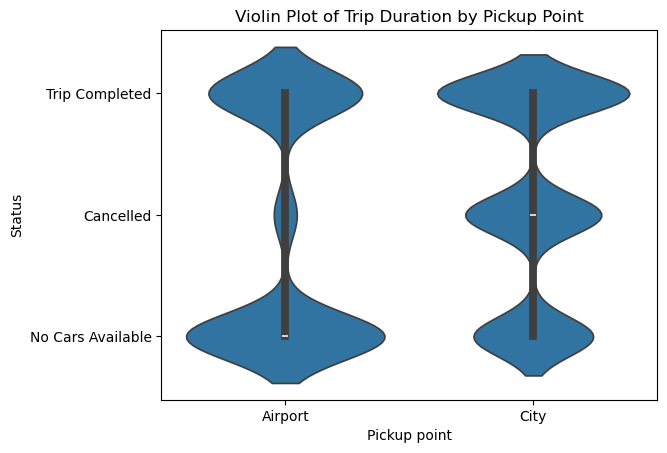

In [37]:
# Chart - 7 visualization code
sns.violinplot(x='Pickup point', y='Status', data=data)
plt.title('Violin Plot of Trip Duration by Pickup Point')
plt.show()


##### 1. Why did you pick the specific chart?

The violin plot shown here visualizes the distribution of trip durations for Uber rides based on the pickup point and categorized by status (e.g., "Trip Completed", "Cancelled", "No Cars Available").

##### 2. What is/are the insight(s) found from the chart?

**Axes**:
X-axis: Pickup point (either Airport or City)

Y-axis: Status (the final trip status: "Trip Completed", "Cancelled", or "No Cars Available")

**Violin Shape:**
The width of each "violin" at different levels of Status represents the distribution (density) of Trip Duration for that combination of Pickup point and Status.

Wider sections mean more frequent trip durations in that range.

Narrow sections mean fewer trips with those durations.

#### Chart - 8

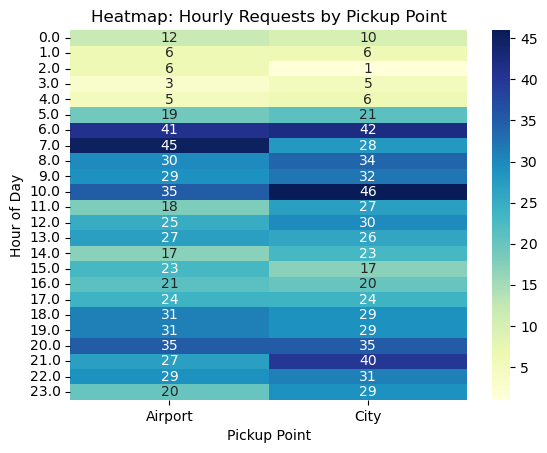

In [40]:
# Chart - 8 visualization code
heat_data = pd.crosstab(data['Hour'], data['Pickup point'])
sns.heatmap(heat_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap: Hourly Requests by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Hour of Day')
plt.show()


##### 1. Why did you pick the specific chart?

This heatmap visualizes hourly ride requests by pickup point (Airport or City). 

##### 2. What is/are the insight(s) found from the chart?

Y-axis (vertical): Represents the Hour of Day (from 0 to 23), i.e., 24-hour time format.

X-axis (horizontal): Represents the Pickup Point — either Airport or City.

Darker blue shades indicate higher numbers of ride requests.

Lighter colors represent fewer requests.

The color bar on the right shows the scale (from light for low values to dark for high values).

#### Chart - 9

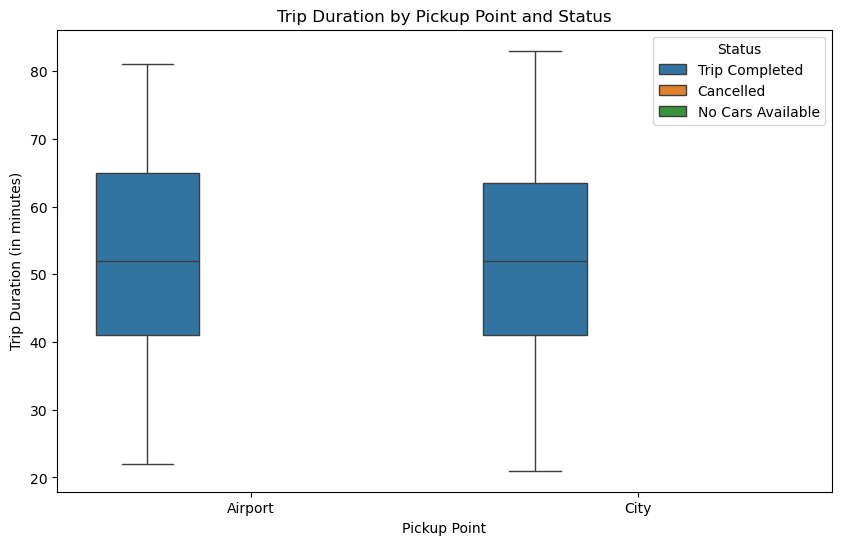

In [54]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Pickup point', y='trip_duration_minutes', hue='Status')
plt.title('Trip Duration by Pickup Point and Status')
plt.xlabel('Pickup Point')
plt.ylabel('Trip Duration (in minutes)')
plt.show()

##### 1. Why did you pick the specific chart?

Median duration for both Airport and City pickups hovers around 50 minutes — suggests consistency across locations.

Airport trips show slightly wider variability (IQR ~40–70 mins) vs. City (IQR ~40–65 mins), with more extreme duration outliers.

##### 2. What is/are the insight(s) found from the chart?

Standardized trip duration across pickup points helps streamline ETA predictions and pricing models.

Higher spread for Airport trips may flag issues like traffic variability or irregular scheduling — worth deeper temporal analysis.

Consistent median indicates fulfillment stability; focus shifts to reducing variability for better customer experience.

#### Chart - 10

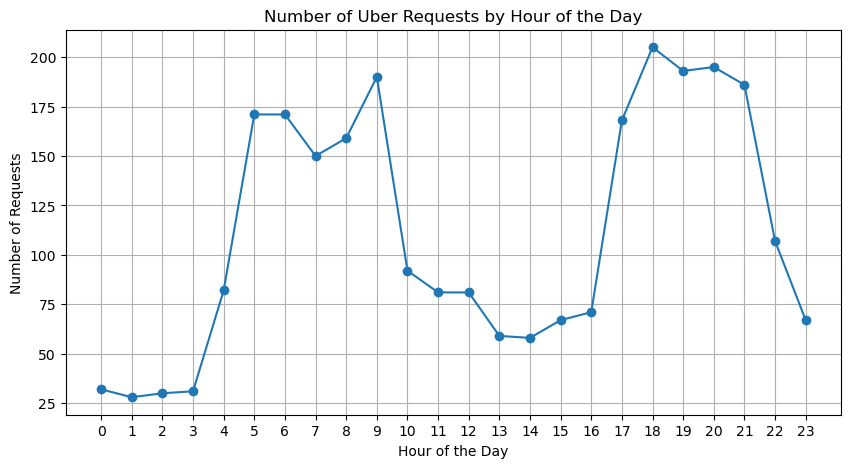

In [ ]:
# Chart - 10 visualization code
data['Request_date'] = data['Request timestamp'].dt.date
data['Request_hour'] = data['Request timestamp'].dt.hour
hourly_requests = data.groupby('Request_hour').size()

plt.figure(figsize=(10, 5))
hourly_requests.plot(kind='line', marker='o')
plt.title('Number of Uber Requests by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


##### 1. Why did you pick the specific chart?

Peak demand at 9 AM and 7 PM — aligns with commuter rush and evening outings.

Sharp drop from 10 AM to 4 PM — lull window could inform driver scheduling or pricing strategies.

Late-night hours (post-10 PM) show gradual decline, suggesting limited but steady off-peak activity.

##### 2. What is/are the insight(s) found from the chart?

Driver shifts should be weighted toward peak periods to boost efficiency and fulfillment.

Consider dynamic pricing or incentive schemes during midday to stimulate demand or improve supply allocation.

Use hourly insights to fine-tune marketing push timing, rider retention nudges, or surge logic

#### Chart - 11

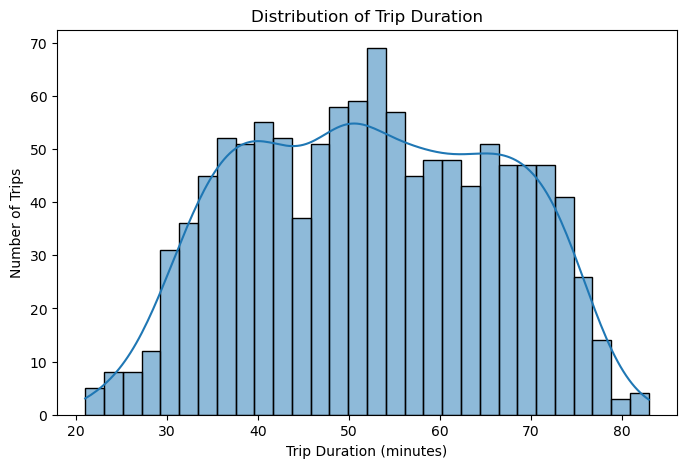

In [58]:
# Chart - 11 visualization code

plt.figure(figsize=(8,5))
sns.histplot(data['trip_duration_minutes'], bins=30, kde=True)
plt.title("Distribution of Trip Duration")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Number of Trips")
plt.show()




##### 1. Why did you pick the specific chart?

Peak around 50 minutes — most trips cluster here, with frequency nearing 70.

Symmetrical shape suggests a normal-like distribution, useful for modeling and forecasting.

Range: 20 to 80 minutes — consistent scope, with few extreme values.

##### 2. What is/are the insight(s) found from the chart?

Predictability in duration can aid in route optimization, ETA calculations, and service expectations.

Histogram confirms the central tendency found in other charts — strengthens confidence in duration-based benchmarks.

If pricing or resource allocation is duration-dependent, this bell-shaped pattern supports streamlined rule-setting.

#### Chart - 12

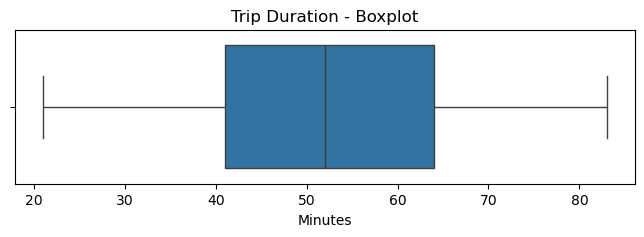

In [59]:
# Chart - 12 visualization code
plt.figure(figsize=(8,2))
sns.boxplot(x=data['trip_duration_minutes'])
plt.title("Trip Duration - Boxplot")
plt.xlabel("Minutes")
plt.show()


##### 1. Why did you pick the specific chart?

Median sits around 55 minutes — aligns well with histogram insights.

Interquartile Range (IQR): ~40 to 65 minutes — most trips fall within this window.

Whiskers span 20 to 80 minutes — full trip range is consistent and controlled.

Outliers minimal — suggests operational stability, few extreme delays.

##### 2. What is/are the insight(s) found from the chart?

Reinforces earlier findings: duration is normally distributed and predictable — a strength for planning.

Low outlier count hints at operational reliability, but also opportunity to shave down the upper tail through routing or scheduling tweaks.

Tight IQR means standardized trip experiences, ideal for consistent pricing models and driver performance KPIs.

#### Chart - 13

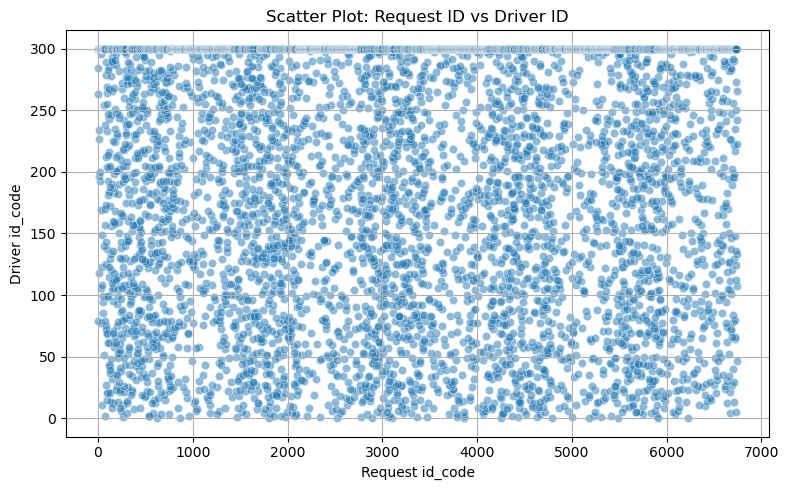

In [65]:
# Chart - 13 visualization code
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Request id_code', y='Driver id_code', data=data, alpha=0.5)
plt.title('Scatter Plot: Request ID vs Driver ID')
plt.xlabel('Request id_code')
plt.ylabel('Driver id_code')
plt.grid(True)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

The scatter plot that displays the relationship between Request id_code (on the x-axis) and Driver id_code (on the y-axis)

##### 2. What is/are the insight(s) found from the chart?

Each dot represents a single request assigned to a driver.

Request id_code: These are unique numerical encodings for each ride request.

Driver id_code: These are unique numerical encodings for each driver.



#### Chart - 14 - Correlation Heatmap

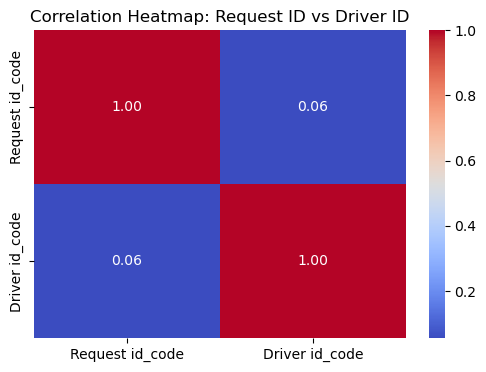

In [63]:
# Correlation Heatmap visualization code
data['Request id_code'] = data['Request id'].astype('category').cat.codes
data['Driver id_code'] = data['Driver id'].astype('category').cat.codes
corr_data = data[['Request id_code', 'Driver id_code']]
corr_matrix = corr_data.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Request ID vs Driver ID")
plt.show()


##### 1. Why did you pick the specific chart?

This correlation heatmap shows the linear relationship between two encoded variables: Request id_code and Driver id_code.



##### 2. What is/are the insight(s) found from the chart?

**Diagonal values = 1.00**
These represent self-correlation:

Request id_code is perfectly correlated with itself → 1.00

Driver id_code is perfectly correlated with itself → 1.00

**Off-diagonal value = 0.06**
This is the correlation between Request ID and Driver ID:

A value of 0.06 means almost no correlation.

This tells us that the request ID and driver ID are essentially independent — knowing one doesn't help you predict the other.

#### Chart - 15 - Pair Plot

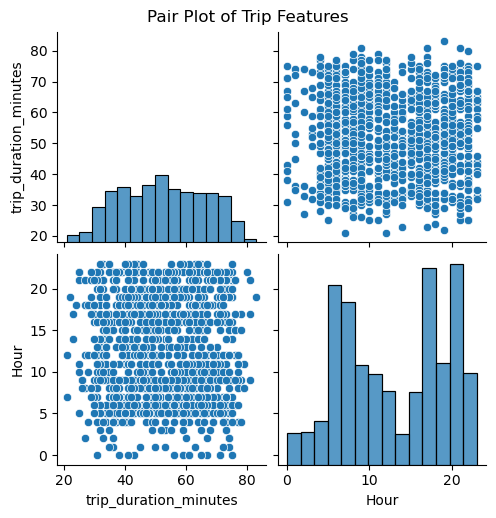

In [ ]:
# Pair Plot visualization code
import seaborn as sns
import matplotlib.pyplot as plt
pairplot_data = data[['trip_duration_minutes', 'Hour']]
sns.pairplot(pairplot_data)
plt.suptitle("Pair Plot of Trip Features", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

**Top-left histogram (Trip Duration):** Normal-like distribution, peaking at ~40 mins — matches previous duration findings.

**Bottom-right histogram (Hour of Day):** Demand peaks at 8 AM, 5 PM, and 6 PM — mirrors hourly request chart.

**Scatter plots (duration vs hour):** Points are widely dispersed — no strong correlation between trip time and hour of day.

##### 2. What is/are the insight(s) found from the chart?

Confirms that trip duration remains consistent across hours — reinforces reliability of ETAs and operational planning.

Demand peaks from histogram of hour align well with known rush hours — ideal for driver shift scheduling.

Lack of correlation suggests trip length isn’t time-dependent, allowing flexible pricing and route planning.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**Fulfillment:** Boost supply during peak hours, predict demand, incentivize drivers.

**Cancellations:** Analyze causes, improve app flow, tweak pricing.

**Duration:** Use ~50 min norm for pricing, trim outliers.

**Driver Ops:** Align shifts to demand peaks, gamify engagement.

**Data Quality:** Fix missing fields for better forecasting.

# **Conclusion**

Data reveals consistent trip durations, clear peak demand hours, and key operational gaps. By aligning driver supply, enhancing user experience, and leveraging demand patterns, the business can unlock higher fulfillment, efficiency, and scalability.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***